In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar, norm_df


In [2]:
df = pd.read_pickle('2.1combined_stats.pkl')
new_index = [name.replace('_10yrs', '') for name in df.index]
df.index=new_index

In [3]:
df

metric,Mean SnL_ELAISS1 HealpixSubsetSlicer,Median SnL_ELAISS1 HealpixSubsetSlicer,Sum SnL_ELAISS1 HealpixSubsetSlicer,"Median ELAISS1, Count all HealpixSubsetSlicer",Mean SnL_XMM-LSS HealpixSubsetSlicer,Median SnL_XMM-LSS HealpixSubsetSlicer,Sum SnL_XMM-LSS HealpixSubsetSlicer,"Median XMM-LSS, Count all HealpixSubsetSlicer",Mean SnL_ECDFS HealpixSubsetSlicer,Median SnL_ECDFS HealpixSubsetSlicer,...,Rms AGN SF_uncert i band HealpixSlicer,Median AGN SF_uncert i band HealpixSlicer,Max AGN SF_uncert i band HealpixSlicer,Min AGN SF_uncert i band HealpixSlicer,N(+3Sigma) AGN SF_uncert i band HealpixSlicer,N(-3Sigma) AGN SF_uncert i band HealpixSlicer,AGN SF_uncert i band HealpixSlicer,25th%ile AGN SF_uncert i band HealpixSlicer,75th%ile AGN SF_uncert i band HealpixSlicer,AreaThreshold AGN SF_uncert i band HealpixSlicer
baseline_v2.1,0.000009,0.000009,0.013812,9127.0,0.000009,0.000008,0.013001,8941.0,0.000009,0.000009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ddf_accourd_sf0.05_lsf0.1_lsr0.1_v2.1,0.000010,0.000010,0.015652,10182.0,0.000010,0.000010,0.014510,10337.0,0.000010,0.000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ddf_accourd_sf0.05_lsf0.1_lsr0.3_v2.1,0.000011,0.000011,0.016083,10023.0,0.000010,0.000010,0.015189,9962.0,0.000010,0.000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ddf_accourd_sf0.05_lsf0.1_lsr0.5_v2.1,0.000011,0.000011,0.015972,9984.0,0.000010,0.000010,0.014928,9540.0,0.000010,0.000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ddf_accourd_sf0.05_lsf0.2_lsr0.1_v2.1,0.000010,0.000010,0.014993,10415.0,0.000010,0.000010,0.014529,10472.0,0.000010,0.000010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shave_30_v2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028433,0.039025,0.332841,0.017187,587.0,0.0,28524.0,0.032634,0.051799,12649.833821
shave_32_v2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029379,0.037020,0.357527,0.016374,619.0,0.0,28598.0,0.031192,0.050222,14075.793724
shave_35_v2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029737,0.034809,0.394451,0.014906,599.0,0.0,28867.0,0.028845,0.049014,15209.679439
shave_38_v2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.030894,0.033063,0.409284,0.013002,640.0,0.0,28911.0,0.027023,0.045868,16388.047716


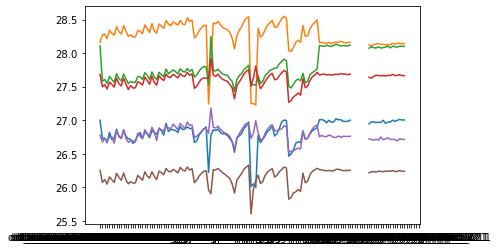

In [4]:
for filtername in 'ugrizy':
    plt.plot(df['Median COSMOS, 5-sigma %s %s HealpixSubsetSlicer' % (filtername, filtername)])

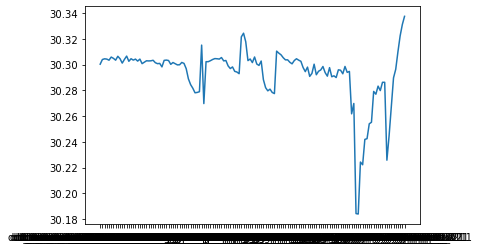

In [5]:
plt.plot(df['Median SurfaceBrightLimit r HealpixSlicer'])

In [6]:
np.where(np.isnan(df['Sum COSMOS, SNe_nSN  HealpixSubsetSlicer'].values))

(array([107, 108, 109, 110, 111, 112, 113, 130, 131, 132, 133, 134, 135,
        136, 137, 138]),)

In [7]:
df.index[96]  # That's ok, that one isn't supposed to be there

'good_seeing_gsw20.0_v2.1'

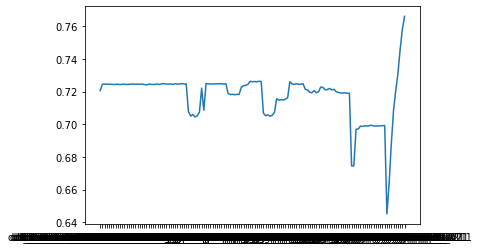

In [8]:
plt.plot(df['OpenShutterFraction'])

In [9]:
df['OpenShutterFraction'][60:80]

ddf_double_slf0.20_v2.1                      0.718381
ddf_double_slf0.25_v2.1                      0.718040
ddf_double_slf0.30_v2.1                      0.718312
ddf_double_slf0.35_v2.1                      0.718281
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1    0.722694
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1    0.723643
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1    0.723809
ddf_euclid_moved_slf0.20_v2.1                0.724492
ddf_old_rot_slf0.10_v2.1                     0.726356
ddf_old_rot_slf0.15_v2.1                     0.725999
ddf_old_rot_slf0.20_v2.1                     0.726207
ddf_old_rot_slf0.25_v2.1                     0.725954
ddf_old_rot_slf0.30_v2.1                     0.726332
ddf_old_rot_slf0.35_v2.1                     0.726179
ddf_quad_slf0.10_v2.1                        0.706837
ddf_quad_slf0.15_v2.1                        0.705251
ddf_quad_slf0.20_v2.1                        0.705760
ddf_quad_slf0.25_v2.1                        0.704953
ddf_quad_slf0.30_v2.1       

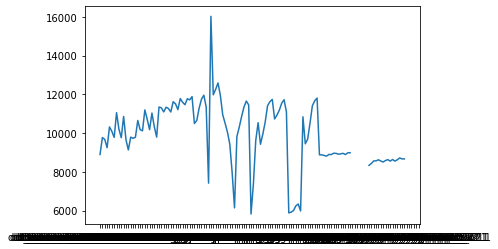

In [10]:
plt.plot(df['Median COSMOS, Count all  HealpixSubsetSlicer'])

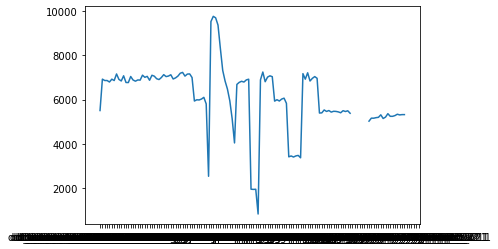

In [11]:
plt.plot(df['Median EDFS, Count all  HealpixSubsetSlicer'])

Text(0, 0.5, 'N SNe')

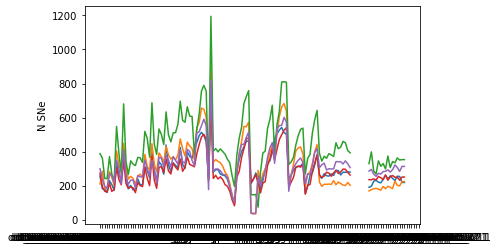

In [12]:
plt.plot(df['Sum COSMOS, SNe_nSN  HealpixSubsetSlicer'])
plt.plot(df['Sum ECDFS, SNe_nSN  HealpixSubsetSlicer'])
plt.plot(df['Sum EDFS, SNe_nSN  HealpixSubsetSlicer'])
plt.plot(df['Sum XMM-LSS, SNe_nSN  HealpixSubsetSlicer'])
plt.plot(df['Sum ELAISS1, SNe_nSN  HealpixSubsetSlicer'])
plt.ylabel('N SNe')

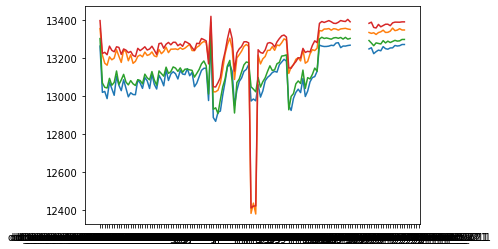

In [13]:
for name in ['COSMOS', 'ECDFS',  'XMM-LSS', 'ELAISS1']:
    
    plt.plot(df['Total QSO QSO_N_r_%s r HealpixSubsetSlicer' % name])


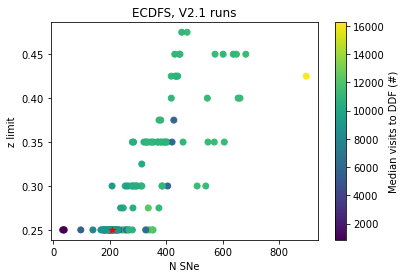

In [14]:
ddf_name = 'ECDFS' #'XMM-LSS'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name],
            c=df['Median %s, Count all  HealpixSubsetSlicer' % ddf_name])
cb = plt.colorbar()
cb.set_label('Median visits to DDF (#)')
plt.xlabel('N SNe')
plt.ylabel('z limit')
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name][0],
        marker='*', color='red')

In [15]:
indx = np.where(df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name].values > 0.38)[0]
for ind in indx:
    print(df.index.values[ind], df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name].values[ind],
         df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name].values[ind],
         df['fONv MedianNvis fO  HealpixSlicer'].values[ind])


ddf_accourd_sf0.05_lsf0.4_lsr0.1_v2.1 0.45 448.662 833.0
ddf_accourd_sf0.10_lsf0.4_lsr0.1_v2.1 0.45 445.977 833.0
ddf_accourd_sf0.20_lsf0.4_lsr0.1_v2.1 0.45 430.22400000000005 832.0
ddf_accourd_sf0.25_lsf0.4_lsr0.1_v2.1 0.475 473.876 831.0
ddf_accourd_sf0.25_lsf0.4_lsr0.3_v2.1 0.42500000000000004 417.64500000000004 831.0
ddf_accourd_sf0.30_lsf0.4_lsr0.1_v2.1 0.475 454.97999999999996 832.0
ddf_accourd_sf0.30_lsf0.4_lsr0.3_v2.1 0.42500000000000004 433.041 831.0
ddf_accourd_sf0.30_lsf0.4_lsr0.5_v2.1 0.4 417.828 832.0
ddf_bright_slf0.25_v2.1 0.4 654.899 806.0
ddf_bright_slf0.30_v2.1 0.45 649.077 807.0
ddf_bright_slf0.35_v2.1 0.45 601.7749999999999 812.0
ddf_deep_u_slf0.20_v2.1 0.42500000000000004 896.6389999999999 787.0
ddf_double_slf0.30_v2.1 0.4 545.8670000000001 824.0
ddf_double_slf0.35_v2.1 0.45 572.9959999999999 824.0
ddf_old_rot_slf0.35_v2.1 0.42500000000000004 434.713 833.0
ddf_quad_slf0.25_v2.1 0.4 661.7629999999999 807.0
ddf_quad_slf0.30_v2.1 0.45 682.2360000000001 808.0
ddf_quad_

In [16]:
indx = np.where(np.array(['deep' in val for val in df.index]) == True)[0]
for ind in indx:
    print(df.index.values[ind], df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name].values[ind],
         df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name].values[ind],
         df['fONv MedianNvis fO  HealpixSlicer'].values[ind])


ddf_deep_rolling_slf0.20_v2.1 0.25 231.90200000000002 856.0
ddf_deep_u_slf0.20_v2.1 0.42500000000000004 896.6389999999999 787.0
ddf_early_deep_slf0.20_f10.60_f20.70_v2.1 0.25 36.864 868.0
ddf_early_deep_slf0.20_f10.60_f20.75_v2.1 0.25 37.756 866.0
ddf_early_deep_slf0.20_f10.60_f20.80_v2.1 0.25 32.859 862.0


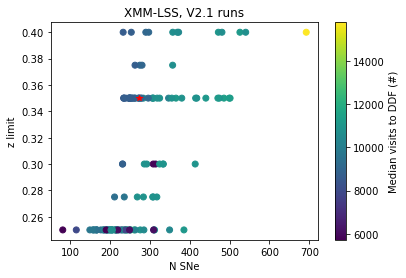

In [17]:
ddf_name = 'XMM-LSS'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name],
            c=df['Median %s, Count all  HealpixSubsetSlicer' % ddf_name])
cb = plt.colorbar()
cb.set_label('Median visits to DDF (#)')
plt.xlabel('N SNe')
plt.ylabel('z limit')
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name][0],
        marker='*', color='red')

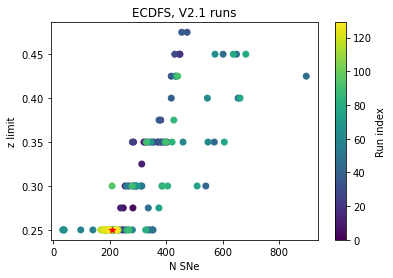

In [18]:
ddf_name = 'ECDFS' #'XMM-LSS'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name],
            c=np.arange(df.shape[0]))
cb = plt.colorbar()
cb.set_label('Run index')
plt.xlabel('N SNe')
plt.ylabel('z limit')
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name][0],
        marker='*', color='red')

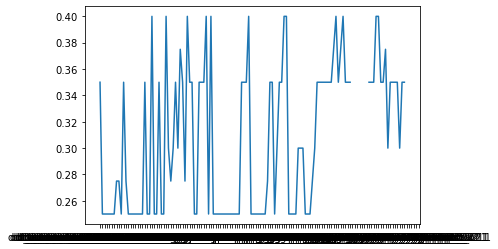

In [19]:
plt.plot(df['Median XMM-LSS, SNe_zlim  HealpixSubsetSlicer'])


In [20]:
# Let's figure out which things we might like to do in a radar plot


In [21]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax',
            'best18k properMotion  HealpixSlicer': 'proper motion',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': 'fast microlensing',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': 'slow microlensing',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'DifferentialCompleteness H = 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO bright',
            'DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO faint',
            'DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer': 'TNO',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'Transients, KNe',}
invert_cols = ['parallax', 'proper motion']



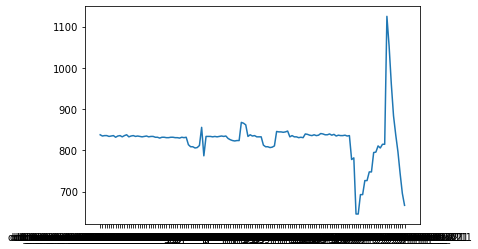

In [22]:
plt.plot(df['fONv MedianNvis fO  HealpixSlicer'])

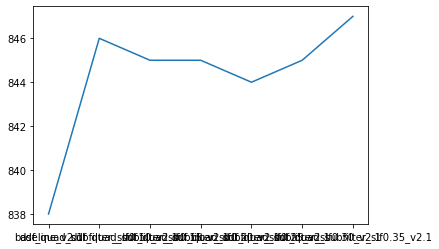

In [23]:
runs = [df.index[0]]  + [run for run in df.index if 'subfi' in run]
plt.plot(df['fONv MedianNvis fO  HealpixSlicer'][runs])

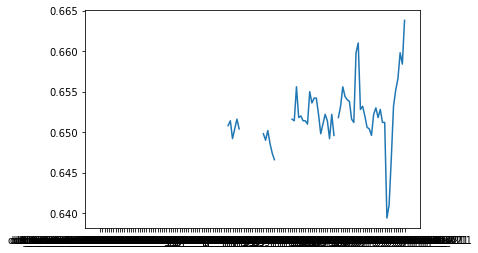

In [24]:
plt.plot(df['DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer'])

In [25]:
data = pd.DataFrame()

In [26]:
for key in name_dict:
    data[name_dict[key]] = df[key]


In [27]:
runs = [data.index[0]] + [name for name in data.index if 'plane' in name and 'pbf' in name]
runs2 = [data.index[0]] + [name for name in data.index if 'plane' in name and 'pbt' in name]

In [28]:
runs

['baseline_v2.1',
 'plane_priority_priority0.1_pbf_v2.1',
 'plane_priority_priority0.2_pbf_v2.1',
 'plane_priority_priority0.3_pbf_v2.1',
 'plane_priority_priority0.4_pbf_v2.1',
 'plane_priority_priority0.6_pbf_v2.1',
 'plane_priority_priority0.9_pbf_v2.1',
 'plane_priority_priority1.2_pbf_v2.1']

In [29]:
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')

In [30]:
ndata

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe"
baseline_v2.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
plane_priority_priority0.1_pbf_v2.1,1.030048,0.996467,0.930293,1.003479,0.770883,1.013769,0.987060,1.008560,0.518378,0.775491,0.748663,0.742515
plane_priority_priority0.2_pbf_v2.1,1.008877,1.010586,0.995440,1.026670,0.826969,1.006239,1.003623,0.997860,0.677273,0.885239,0.812834,0.892216
plane_priority_priority0.3_pbf_v2.1,1.012777,1.014828,1.000651,1.037801,0.867542,1.001936,0.990166,0.996637,0.776562,0.933195,0.860963,0.922156
plane_priority_priority0.4_pbf_v2.1,1.016902,1.016628,1.054072,1.051948,0.892601,1.001291,0.981884,0.994191,0.842318,0.960538,0.893048,1.000000
plane_priority_priority0.6_pbf_v2.1,1.009323,1.007619,1.088599,1.053803,0.948687,1.000430,0.978261,0.996943,0.960847,0.983467,0.946524,1.023952
plane_priority_priority0.9_pbf_v2.1,1.003241,0.998150,1.020847,1.013451,0.967780,0.999785,0.997412,0.996331,0.994146,0.999116,0.967914,1.107784
plane_priority_priority1.2_pbf_v2.1,1.000982,1.000136,1.009121,1.000232,0.972554,0.998494,0.990166,0.995414,0.997041,1.004966,0.973262,1.113772


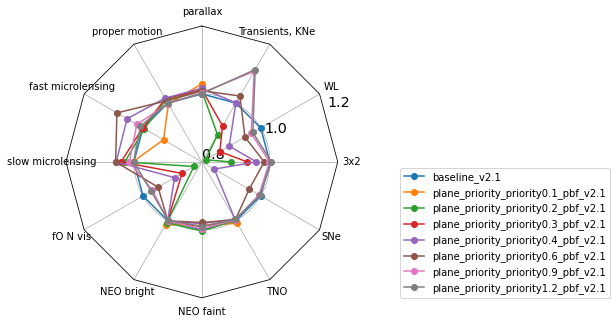

In [31]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
#fig.tight_layout()

In [32]:
ndata = norm_df(data, runs2, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
ndata

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe"
baseline_v2.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
plane_priority_priority0.1_pbt_v2.1,1.029260,0.995888,0.964169,1.022727,0.770883,1.013985,1.002070,1.010394,0.521365,0.776733,0.748663,0.730539
plane_priority_priority0.2_pbt_v2.1,1.009143,1.008377,0.957655,1.023423,0.826969,1.005594,1.005176,0.998471,0.665586,0.881577,0.812834,0.844311
plane_priority_priority0.3_pbt_v2.1,1.011915,1.017274,1.011075,1.014842,0.867542,1.001506,0.993271,0.994497,0.796838,0.931325,0.860963,0.946108
plane_priority_priority0.4_pbt_v2.1,1.017607,1.017681,1.062541,1.059369,0.892601,1.000645,0.976190,0.992969,0.826020,0.951440,0.887701,1.017964
plane_priority_priority0.6_pbt_v2.1,1.012558,1.008554,1.042997,1.025278,0.949881,0.999785,0.979814,0.998166,0.958753,0.989211,0.946524,1.095808
plane_priority_priority0.9_pbt_v2.1,1.006487,1.000830,1.039088,1.026902,0.961814,1.003227,0.980849,0.997860,0.977016,0.996070,0.962567,1.173653
plane_priority_priority1.2_pbt_v2.1,1.000982,1.000136,1.009121,1.000232,0.972554,0.998494,0.990166,0.995414,0.997041,1.004966,0.973262,1.113772


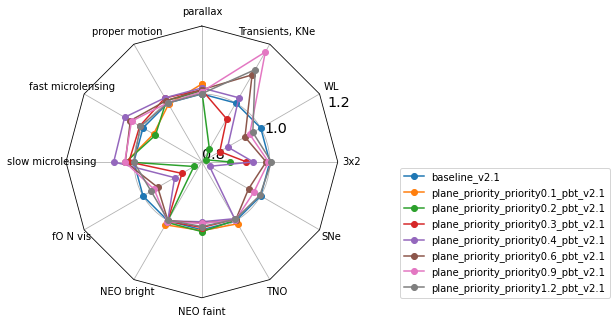

In [33]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
#fig.tight_layout()

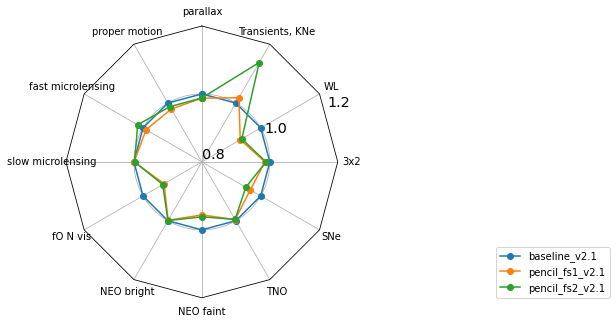

In [34]:
runs = [data.index[0]] + [name for name in data.index if 'pencil' in name]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


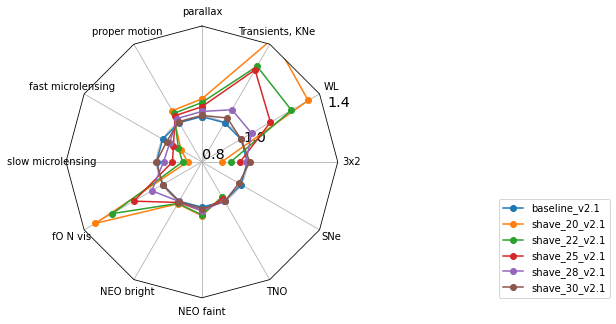

In [35]:
runs = [data.index[0]] + [name for name in data.index if 'shave' in name][0:5]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.4], bbox_to_anchor=(2, 0))
fig.savefig('shave_shorter.pdf', bbox_inches="tight")

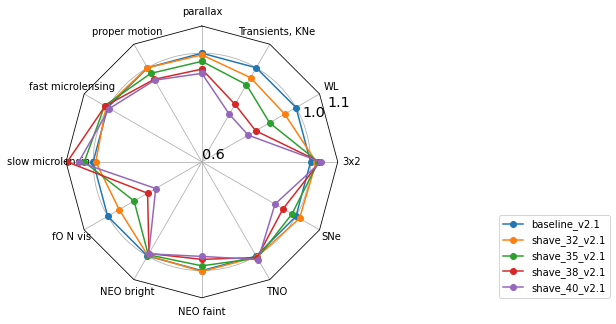

In [36]:
runs = [data.index[0]] + [name for name in data.index if 'shave' in name][5:]

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.6, 1.0, 1.1], bbox_to_anchor=(2, 0))
fig.savefig('shave_longer.pdf', bbox_inches="tight")

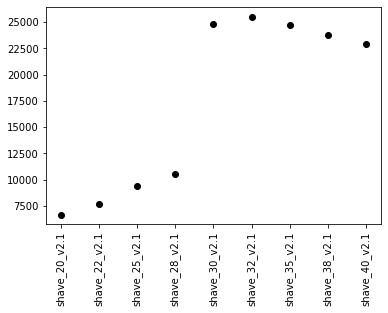

In [37]:
runs = [name for name in data.index if 'shave' in name]
fig, ax = plt.subplots()

ax.plot(data['SNe'].loc[runs], 'ko')
ack = ax.tick_params('x',  rotation=90)

In [38]:
[col for col in df.columns if 'Presto' in col]

['Median PrestoKNe__presto_color_detect  UserPointsSlicer',
 'Sum PrestoKNe__presto_color_detect  UserPointsSlicer',
 'Median PrestoKNe__scoreP  UserPointsSlicer',
 'Sum PrestoKNe__scoreP  UserPointsSlicer',
 'Median PrestoKNe__scoreS  UserPointsSlicer',
 'Sum PrestoKNe__scoreS  UserPointsSlicer']

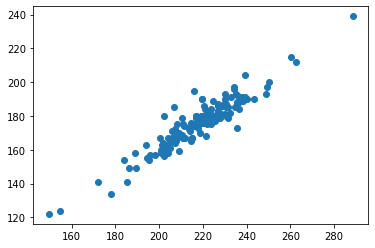

In [39]:
plt.scatter(df['Sum PrestoKNe__scoreP  UserPointsSlicer'],
           df['Sum PrestoKNe__scoreS  UserPointsSlicer'])

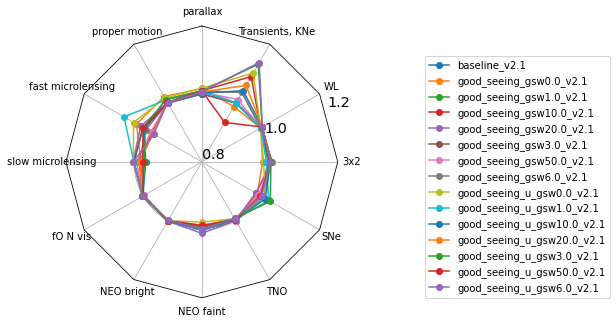

In [64]:
runs = [data.index[0]] + [name for name in data.index if 'good_see' in name]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('good_seeing.pdf', bbox_inches="tight")

In [41]:
# Do I have the median depths in each filter for the DDFs?
[col for col in df.columns if 'ELAISS1' in col]

['Mean SnL_ELAISS1  HealpixSubsetSlicer',
 'Median SnL_ELAISS1  HealpixSubsetSlicer',
 'Sum SnL_ELAISS1  HealpixSubsetSlicer',
 'Median ELAISS1, Count all  HealpixSubsetSlicer',
 'Mean ELAISS1, SNe_nSN  HealpixSubsetSlicer',
 'Median ELAISS1, SNe_nSN  HealpixSubsetSlicer',
 'Sum ELAISS1, SNe_nSN  HealpixSubsetSlicer',
 'Mean ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Median ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Sum ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Total QSO QSO_N_r_ELAISS1 r HealpixSubsetSlicer',
 'Median AGN SF Uncert, ELAISS1 SFU, ELAISS1 r HealpixSubsetSlicer',
 'Median ELAISS1, 5-sigma r r HealpixSubsetSlicer',
 'Median ELAISS1, Count r r HealpixSubsetSlicer',
 'Mean Median Inter-Night Gap, ELAISS1 r note like DD:ELAISS1% and r UserPointsSlicer',
 'Total QSO QSO_N_y_ELAISS1 y HealpixSubsetSlicer',
 'Median AGN SF Uncert, ELAISS1 SFU, ELAISS1 y HealpixSubsetSlicer',
 'Median ELAISS1, 5-sigma y y HealpixSubsetSlicer',
 'Median ELAISS1, Count y y HealpixSubsetSlicer',
 

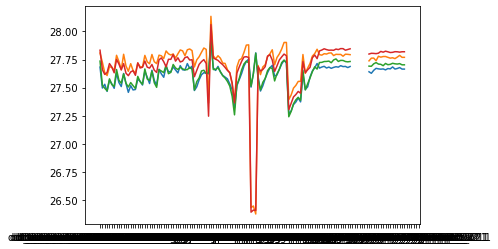

In [42]:
for name in ['COSMOS', 'ECDFS',  'XMM-LSS', 'ELAISS1']:
    plt.plot(df['Median %s, 5-sigma i i HealpixSubsetSlicer' % name])


In [43]:
np.where(df['Median COSMOS, 5-sigma i i HealpixSubsetSlicer'] < 27.4)

(array([57, 80, 81, 82, 83, 85]),)

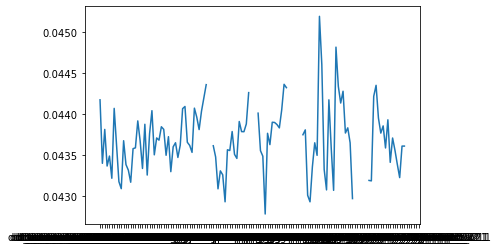

In [44]:
plt.plot(df['Median AGN SF_error r band HealpixSlicer'])

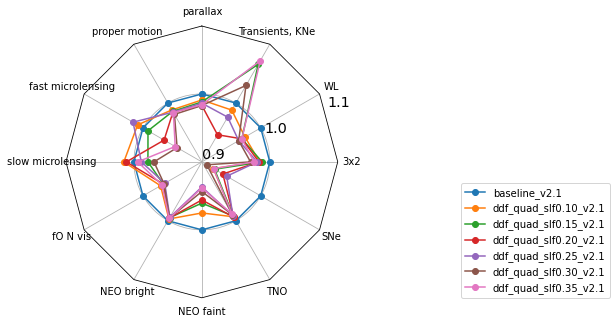

In [45]:
runs = [data.index[0]] + [name for name in data.index if 'quad_sl' in name]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(2, 0))


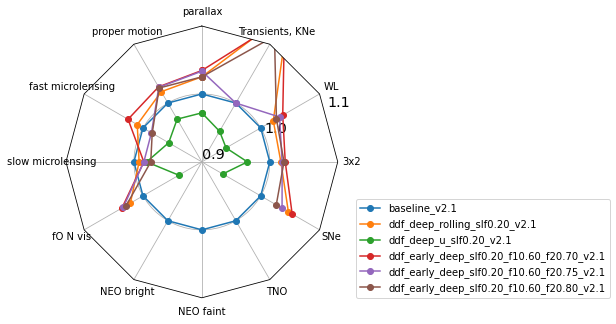

In [46]:
runs = [data.index[0]] + [name for name in data.index if 'deep' in name]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(2, 0))


In [47]:
# Let's look at the depths of the DDF fields
runs = [data.index[0]] + [name for name in data.index if 'ddf_' in name]


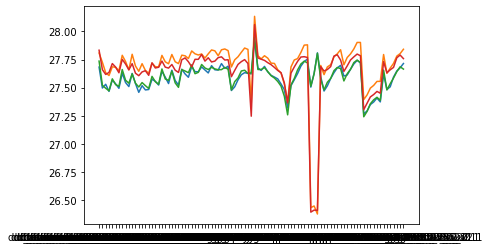

In [48]:
for name in ['COSMOS', 'ECDFS',  'XMM-LSS', 'ELAISS1']:
    plt.plot(df['Median %s, 5-sigma i i HealpixSubsetSlicer' % name][runs])


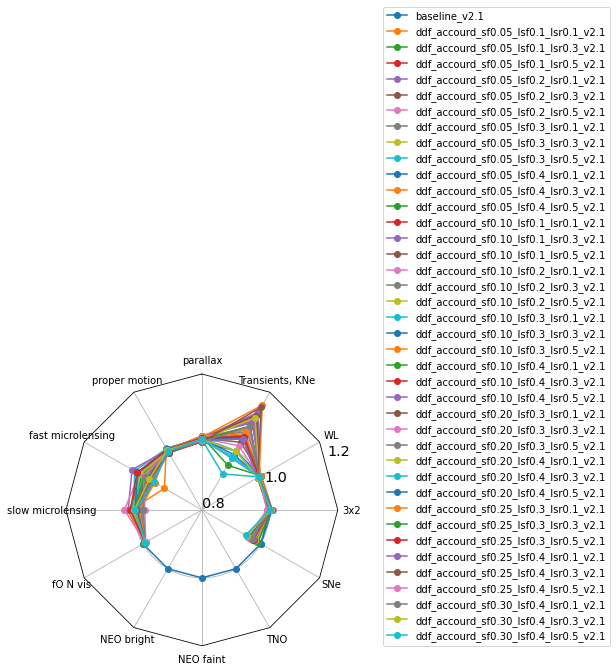

In [49]:
runs = [data.index[0]] + [name for name in data.index if 'accour' in name]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


In [50]:
np.std(df['Sum PrestoKNe__scoreP  UserPointsSlicer'].loc[runs].values)/np.mean(df['Sum PrestoKNe__scoreP  UserPointsSlicer'].loc[runs].values)

0.049339126987580834

In [51]:
# Ah, with only 400 of the presto KNe detected, we expect a SNR of 5%, and sure enough, the STD of the transient values is 5%!


In [52]:
runs =  [name for name in data.index if 'base' in name]

In [53]:
df['Sum PrestoKNe__scoreP  UserPointsSlicer'].loc[runs]

baseline_v2.1    215.028299
Name: Sum PrestoKNe__scoreP  UserPointsSlicer, dtype: float64

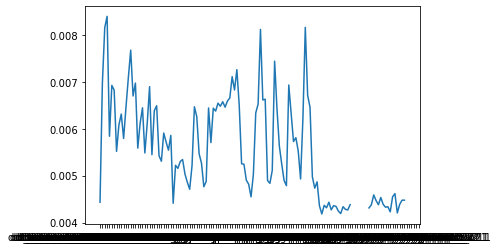

In [54]:
plt.plot(df['Median AGN SF Uncert, ELAISS1 SFU, ELAISS1 u HealpixSubsetSlicer'])

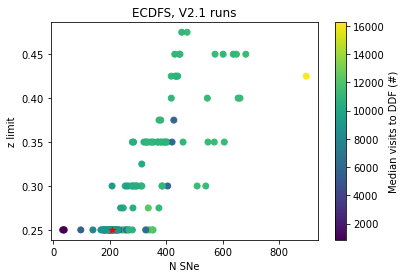

In [55]:
ddf_name = 'ECDFS' #'XMM-LSS'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name],
            c=df['Median %s, Count all  HealpixSubsetSlicer' % ddf_name])
cb = plt.colorbar()
cb.set_label('Median visits to DDF (#)')
plt.xlabel('N SNe')
plt.ylabel('z limit')
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name][0],
        marker='*', color='red')

plt.savefig('nvz.png', facecolor='white')

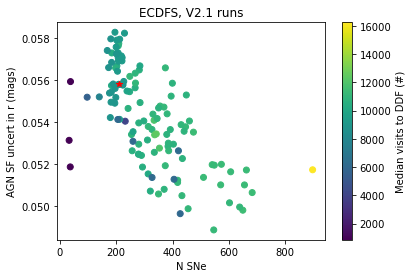

In [56]:
ddf_name = 'ECDFS' #'XMM-LSS'
filtername = 'r'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['Median AGN SF Uncert, %s SFU, %s %s HealpixSubsetSlicer' % (ddf_name, ddf_name, filtername)],
            c=df['Median %s, Count all  HealpixSubsetSlicer' % ddf_name])
cb = plt.colorbar()
cb.set_label('Median visits to DDF (#)')
plt.xlabel('N SNe')
plt.ylabel('AGN SF uncert in %s (mags)' % filtername)
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['Median AGN SF Uncert, %s SFU, %s %s HealpixSubsetSlicer' % (ddf_name, ddf_name, filtername)][0],
        marker='*', color='red')
plt.savefig('nvagn.png', facecolor='white')

In [57]:
indx = np.where(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name].values > 600)[0]
for ind in indx:
    print(df.index.values[ind], df['Median %s, SNe_zlim  HealpixSubsetSlicer' % ddf_name].values[ind],
         df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name].values[ind],
         df['fONv MedianNvis fO  HealpixSlicer'].values[ind])


ddf_bright_slf0.25_v2.1 0.4 654.899 806.0
ddf_bright_slf0.30_v2.1 0.45 649.077 807.0
ddf_bright_slf0.35_v2.1 0.45 601.7749999999999 812.0
ddf_deep_u_slf0.20_v2.1 0.42500000000000004 896.6389999999999 787.0
ddf_quad_slf0.20_v2.1 0.35 605.905 809.0
ddf_quad_slf0.25_v2.1 0.4 661.7629999999999 807.0
ddf_quad_slf0.30_v2.1 0.45 682.2360000000001 808.0
ddf_quad_slf0.35_v2.1 0.45 637.797 811.0


In [58]:
[col for col in df.columns if '5-sigma' in col and 'Median' in col]

['Median ELAISS1, 5-sigma r r HealpixSubsetSlicer',
 'Median XMM-LSS, 5-sigma r r HealpixSubsetSlicer',
 'Median ECDFS, 5-sigma r r HealpixSubsetSlicer',
 'Median COSMOS, 5-sigma r r HealpixSubsetSlicer',
 'Median EDFS, 5-sigma r r HealpixSubsetSlicer',
 'Median ELAISS1, 5-sigma y y HealpixSubsetSlicer',
 'Median XMM-LSS, 5-sigma y y HealpixSubsetSlicer',
 'Median ECDFS, 5-sigma y y HealpixSubsetSlicer',
 'Median COSMOS, 5-sigma y y HealpixSubsetSlicer',
 'Median EDFS, 5-sigma y y HealpixSubsetSlicer',
 'Median ELAISS1, 5-sigma u u HealpixSubsetSlicer',
 'Median XMM-LSS, 5-sigma u u HealpixSubsetSlicer',
 'Median ECDFS, 5-sigma u u HealpixSubsetSlicer',
 'Median COSMOS, 5-sigma u u HealpixSubsetSlicer',
 'Median EDFS, 5-sigma u u HealpixSubsetSlicer',
 'Median ELAISS1, 5-sigma g g HealpixSubsetSlicer',
 'Median XMM-LSS, 5-sigma g g HealpixSubsetSlicer',
 'Median ECDFS, 5-sigma g g HealpixSubsetSlicer',
 'Median COSMOS, 5-sigma g g HealpixSubsetSlicer',
 'Median EDFS, 5-sigma g g Healpi

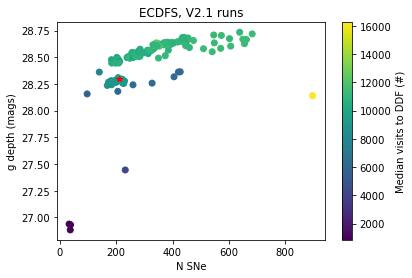

In [59]:
ddf_name = 'ECDFS'
filtername = 'g'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['Median %s, 5-sigma %s %s HealpixSubsetSlicer' % (ddf_name, filtername, filtername)],
            c=df['Median %s, Count all  HealpixSubsetSlicer' % ddf_name])
cb = plt.colorbar()
cb.set_label('Median visits to DDF (#)')
plt.xlabel('N SNe')
plt.ylabel('%s depth (mags)' % filtername)
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['Median %s, 5-sigma %s %s HealpixSubsetSlicer' % (ddf_name, filtername, filtername)][0],
        marker='*', color='red')
plt.savefig('nvg.png', facecolor='white')

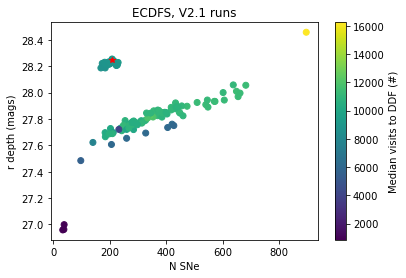

In [60]:
ddf_name = 'ECDFS'
filtername = 'r'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['Median %s, 5-sigma %s %s HealpixSubsetSlicer' % (ddf_name, filtername, filtername)],
            c=df['Median %s, Count all  HealpixSubsetSlicer' % ddf_name])
cb = plt.colorbar()
cb.set_label('Median visits to DDF (#)')
plt.xlabel('N SNe')
plt.ylabel('%s depth (mags)' % filtername)
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['Median %s, 5-sigma %s %s HealpixSubsetSlicer' % (ddf_name, filtername, filtername)][0],
        marker='*', color='red')
plt.savefig('nvr.png', facecolor='white')

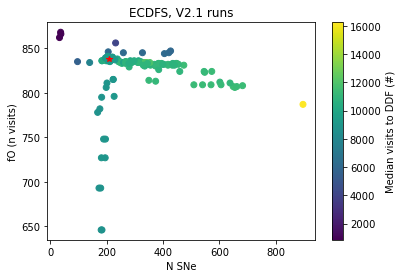

In [61]:
ddf_name = 'ECDFS'
filtername = 'r'
plt.scatter(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name],
            df['fONv MedianNvis fO  HealpixSlicer'],
            c=df['Median %s, Count all  HealpixSubsetSlicer' % ddf_name])
cb = plt.colorbar()
cb.set_label('Median visits to DDF (#)')
plt.xlabel('N SNe')
plt.ylabel('fO (n visits)')
plt.title('%s, V2.1 runs' % ddf_name)

plt.plot(df['Sum %s, SNe_nSN  HealpixSubsetSlicer' % ddf_name][0],
        df['fONv MedianNvis fO  HealpixSlicer'][0],
        marker='*', color='red')
plt.savefig('nvf.png', facecolor='white')

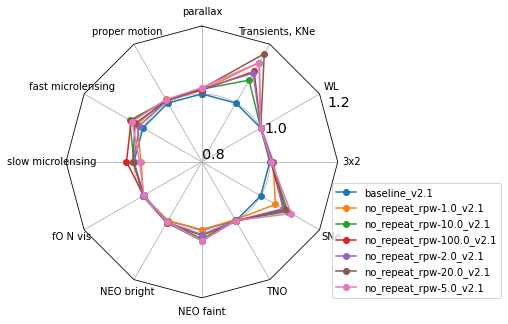

In [62]:
runs = [data.index[0]] + [name for name in data.index if 'no_rep' in name]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('no_repeat.pdf', bbox_inches="tight")

In [63]:
data.loc[runs]

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe"
baseline_v2.1,0.806910,0.188258,0.1535,0.4312,838.0,0.9296,0.3864,0.6542,25120.276,38.560143,187.0,167.0
no_repeat_rpw-1.0_v2.1,0.798440,0.185981,0.1566,0.4221,837.0,0.9298,0.3862,0.6518,26379.408,38.930370,187.0,190.0
no_repeat_rpw-10.0_v2.1,0.795571,0.186649,0.1604,0.4312,836.0,0.9328,0.3966,0.6532,27439.326,38.715392,187.0,180.0
no_repeat_rpw-100.0_v2.1,0.797364,0.186495,0.1597,0.4406,836.0,0.9364,0.3928,0.6556,27090.720,38.676938,187.0,185.0
no_repeat_rpw-2.0_v2.1,0.794857,0.186796,0.1554,0.4318,837.0,0.9350,0.3918,0.6544,27008.289,38.954782,187.0,184.0
no_repeat_rpw-20.0_v2.1,0.794586,0.186891,0.1576,0.4325,835.0,0.9356,0.3988,0.6540,27243.310,38.778164,187.0,195.0
no_repeat_rpw-5.0_v2.1,0.792311,0.186091,0.1592,0.4239,836.0,0.9330,0.3990,0.6538,27728.910,38.749151,187.0,190.0


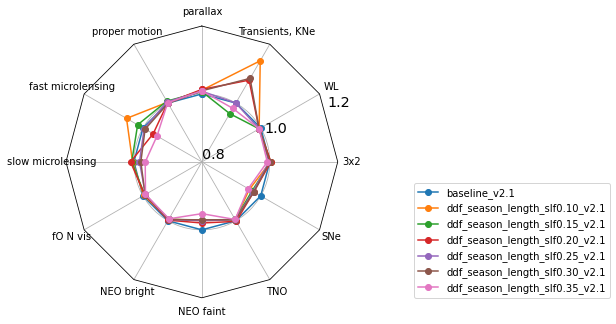

In [67]:
runs = [data.index[0]] + [name for name in data.index if 'season_length' in name]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('ddf_season_length.pdf', bbox_inches="tight")